<h1> Topic-HR Data Prediction</h1>

<h2>Import libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Data reading</h2>

In [2]:
hr=pd.read_csv('aug_train.csv')
print("File read successfull")

File read successfull


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


<h2>Data preprocessing</h2>

### Finding Unique values in experience & last new job, to make data type in proper format

In [5]:
exp=hr['experience'].unique()
print(exp)

['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]


In [6]:
lnj=hr['last_new_job'].unique()
print(lnj)

['1' '>4' 'never' '4' '3' '2' nan]


<li> <b> Replacing noisy values</li>

In [7]:
hr['experience']=hr['experience'].replace({'>20':21,'<1':0})
hr['last_new_job']=hr['last_new_job'].replace({'>4':5,'never':0})

<li>After Replacement-</li>

In [8]:
exp=hr['experience'].unique()
print(exp)
lnj=hr['last_new_job'].unique()
print(lnj)

[21 '15' '5' 0 '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18' '19'
 '12' '3' '6' '9' '8' '20' nan]
['1' 5 0 '4' '3' '2' nan]


### Converting columns into numeric

In [9]:
hr['experience']=pd.to_numeric(hr['experience'],errors='coerce')
hr['last_new_job']=pd.to_numeric(hr['last_new_job'],errors='coerce')

In [10]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [11]:
hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [12]:
gender_unique=hr['gender'].value_counts()
print(gender_unique)

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64


### Handling null valaues of Experience, Education Level and Company Type

In [13]:
hr.describe()

,enrollee_id,city_development_index,experience,last_new_job,training_hours,target
count,19158.000000,19158.000000,19093.000000,18735.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,10.100141,2.000427,65.366896,0.249348
std,9616.292592,0.123362,6.777024,1.675596,60.058462,0.432647
min,1.000000,0.448000,0.000000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,1.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,1.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,3.000000,88.000000,0.000000
max,33380.000000,0.949000,21.000000,5.000000,336.000000,1.000000


In [14]:
# unique values count of company types
comp=hr['company_type'].value_counts()
print(comp)

company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64


In [15]:
hr['company_size'].value_counts()

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

In [16]:
hr['experience'].fillna(hr['experience'].median(),inplace=True)
hr['education_level'].fillna(hr['education_level'].mode()[0],inplace=True)
hr['company_type'].fillna('Unknown',inplace=True)
hr["enrolled_university"].fillna(hr["enrolled_university"].mode()[0],inplace=True)
hr["company_size"].fillna(hr["company_size"].mode()[0],inplace=True)
hr["last_new_job"].fillna(hr["last_new_job"].mean(),inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15272\4011654780.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hr['experience'].fillna(hr['experience'].median(),inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15272\4011654780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

#### 1-What experience group is most likeely to look for new job?
#### 2- Which education level is most common among job seeker?
#### 3-Do candidates with relavent experience,have more traning hours?
#### 4-What is the average experience (in years for each education level?(group by)
#### 5-Which company type has the highest of people waiting to switch the job?

<li>Count of null values after replacements</li>

In [17]:
hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2813
experience                   0
company_size                 0
company_type                 0
last_new_job                 0
training_hours               0
target                       0
dtype: int64

#### Que 1 -What experience group is most likeely to look for new job?

In [18]:
hr.groupby('experience')['target'].mean()*100

experience
0.0     45.402299
1.0     42.440801
2.0     33.185448
3.0     35.302806
4.0     32.573058
5.0     28.811189
6.0     28.207237
7.0     29.474708
8.0     24.314214
9.0     22.583732
10.0    21.015228
11.0    22.740964
12.0    18.623482
13.0    19.298246
14.0    18.259386
15.0    16.618076
16.0    14.173228
17.0    16.666667
18.0    15.357143
19.0    17.434211
20.0    22.297297
21.0    15.307365
Name: target, dtype: float64

#### Que 2-Which education level is most common among job seeker?

In [19]:
hr[hr['target']==1.0]['education_level'].value_counts()

education_level
Graduate          3349
Masters            935
High School        394
Phd                 58
Primary School      41
Name: count, dtype: int64

#### Que 3-Do candidates with relavent experience,have more traning hours?

In [20]:
hr.groupby('relevent_experience')['training_hours'].mean()

relevent_experience
Has relevent experience    65.800174
No relevent experience     64.253261
Name: training_hours, dtype: float64

#### Que 4-What is the average experience (in years for each education level?(group by)¶

In [21]:
hr.groupby('education_level')['experience'].mean()

education_level
Graduate           9.882485
High School        6.497769
Masters           12.088970
Phd               16.463768
Primary School     5.266234
Name: experience, dtype: float64

#### Que 5-Which company type has the highest of people waiting to switch the job?

In [22]:
hr[hr['target'] == 1]['company_type'].value_counts()

company_type
Unknown                2384
Pvt Ltd                1775
Public Sector           210
Early Stage Startup     142
Funded Startup          140
NGO                      97
Other                    29
Name: count, dtype: int64

<h2>Visualization</h2>

In [23]:
hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Unknown,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,Unknown,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,50-99,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


<h2>..Gender vs relevent experience</h2>

<h3>Which gender has most relevent experience?</h3>

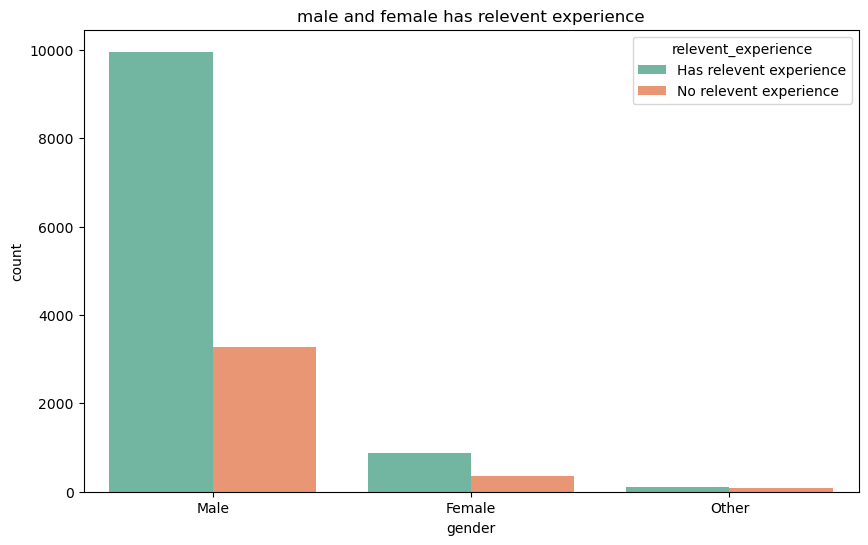

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x="gender",hue="relevent_experience",data=hr, palette='Set2')
plt.xlabel("gender")
plt.ylabel("count")
plt.title("male and female has relevent experience")
plt.show()

<h3>Male has more relevent experience compare to female</h3>
<h3>Other has very low experinece</h3>

<h2>...Male/Female enrolled in university</h2>

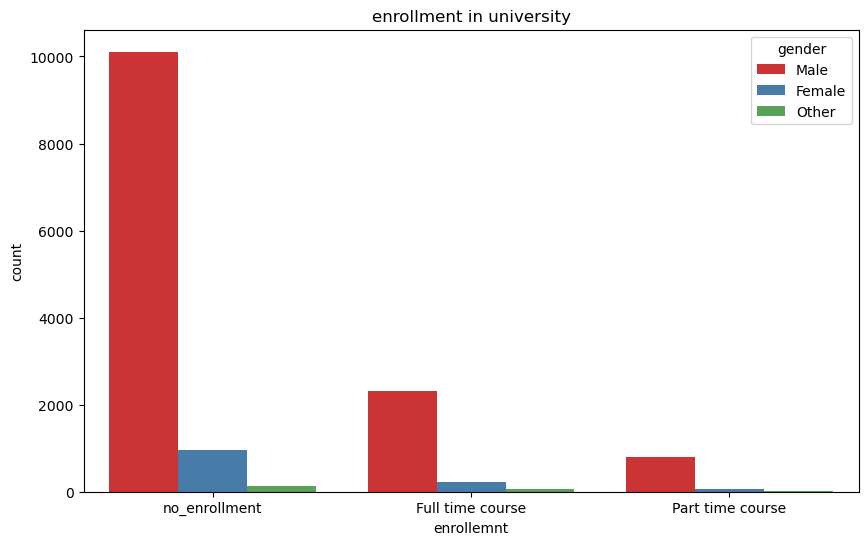

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x="enrolled_university",hue="gender",data=hr, palette='Set1')
plt.xlabel("enrollemnt")
plt.ylabel("count")
plt.title("enrollment in university")
plt.show()

<h3>Full time coursed is mostly inrolled by male</h3>
<h3>Even part time are also enrolled  by men</h3>

<h2>...Experience vs company size</h2>

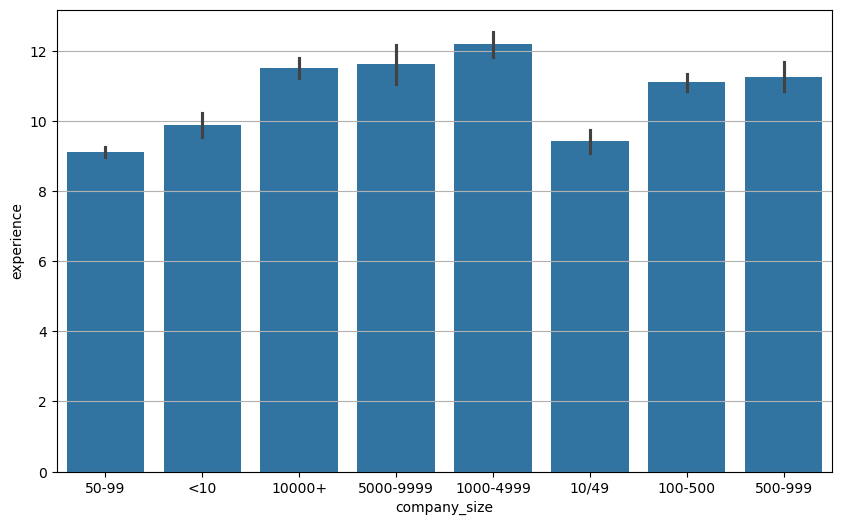

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x="company_size",y="experience",data=hr)
plt.grid(axis="y")
plt.show()

<h3>Company size 1000-4999 are hired experience approx 12 years</h3>
<h3>Company size 50-99 are hired  approx 9 years experience people</h3>

<h2>..Correlativity</h2>

In [27]:
##hr['company_size'].fillna('Unknown',inplace=True)
##hr['gender'].fillna('Unknown',inplace=True)

In [28]:
hr['gender'].value_counts()

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

In [29]:
hr["gender"].fillna(hr["gender"].mode()[0],inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15272\2884797865.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hr["gender"].fillna(hr["gender"].mode()[0],inplace=True)


<h4>Change data type object to numerical</h4>

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hr['gender'] = le.fit_transform(hr['gender'])
hr['relevent_experience'] = le.fit_transform(hr['relevent_experience'])
hr["enrolled_university"] = le.fit_transform(hr["enrolled_university"])
hr['education_level'] = le.fit_transform(hr['education_level'])
hr["company_size"] = le.fit_transform(hr["company_size"])
hr["company_type"] = le.fit_transform(hr["company_type"])


In [31]:
#correlation
hr_corr=hr.corr(numeric_only=True)

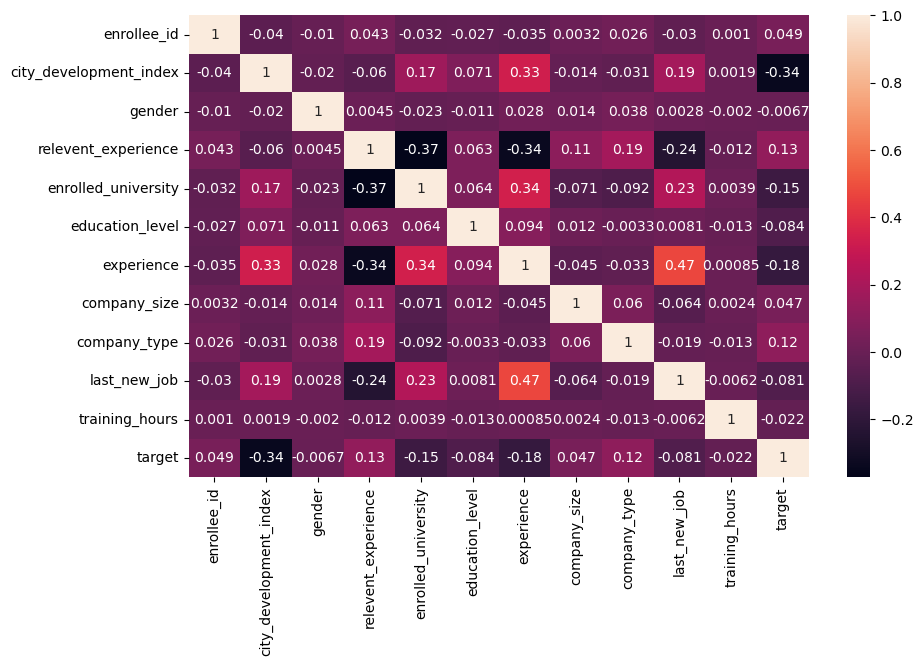

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(hr_corr,annot=True)
plt.show()

<h3>City_development_index ,experience and target has strong corealtion</h3>
<h3>Experience matters, which company hierd you</h3>
<h3>last new job are relaed to city_devlopment_index</h3>

<h2 style="color:blue">Model building:Logistic Regression<h2>

<h2>select algorithm</h2>

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

<h2>feature selection</h2>

In [34]:
x=hr[['city_development_index', 'experience', 'relevent_experience', 'company_type']]
type(x)

pandas.core.frame.DataFrame

In [35]:
hr['target'] = hr['target'].astype(int)
y=hr['target']

<h2>data validation</h2>

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=44)

<h2>model_preparation</h2>

In [37]:
model_ls=LogisticRegression(max_iter=10000)

<h2>model_fitting</h2>

In [38]:
model_ls.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


<h2>Model evolution by  prediction</h2>

In [39]:
y_predict=model_ls.predict(x_test)

In [40]:
accuracy=accuracy_score(y_test,y_predict)
print( "accuracy=" ,accuracy*100)

accuracy= 76.96590118302018


In [41]:
conf_matrix=confusion_matrix(y_test,y_predict)
print("\nconfusion matrix-\n",conf_matrix)


confusion matrix-
 [[4116  249]
 [1075  308]]


In [42]:
class_report=classification_report(y_test,y_predict)
print(" \nclassification_report-\n",class_report)

 
classification_report-
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      4365
           1       0.55      0.22      0.32      1383

    accuracy                           0.77      5748
   macro avg       0.67      0.58      0.59      5748
weighted avg       0.74      0.77      0.73      5748



<h2>User prediction from model</h2>

In [43]:
#take user input
user_input={
    "city_development_index":[float(input("enter city development index"))],
    "experience":[float(input("enter your experirnce"))],
    "relevent_experience":[int(input("your relevent experince"))],
    "company_type":[int(input("your relevent company type"))]
}
user_dataset=pd.DataFrame(user_input)
    

enter city development index 0.920
enter your experirnce 21.0
your relevent experince 0
your relevent company type 0


In [45]:
pred_user=model_ls.predict(user_dataset)
print("target",pred_user)

target [0]
